Importing packages

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import os
import numpy as np
import matplotlib.pyplot as plt

Data Loading

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68608000/68606236 [==============================] - 0s 0us/step


In [0]:
base_dir=os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')


In [0]:
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

Understanding our data

In [0]:
num_cats_tr=len(os.listdir(train_cats_dir))
num_dogs_tr=len(os.listdir(train_dogs_dir))
num_cats_val=len(os.listdir(validation_cats_dir))
num_dogs_val=len(os.listdir(validation_dogs_dir))

total_train=num_cats_tr + num_cats_tr
total_val=num_cats_val + num_dogs_val

In [9]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


Setting Model Parameters

In [0]:
BATCH_SIZE = 100
IMG_SHAPE  = 150 # Our training data consists of images with width of 150 pixels and height of 150 pixels

Data Augmentation

In [0]:
def plotImages(images_arr):
  fig,axes=plt.subplots(1,5,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

Flipping the image horizontally

In [13]:
image_gen=ImageDataGenerator(rescale=1./255,horizontal_flip=True)
train_data_gen=image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                             directory=train_dir,
                                             shuffle=True,
                                             target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


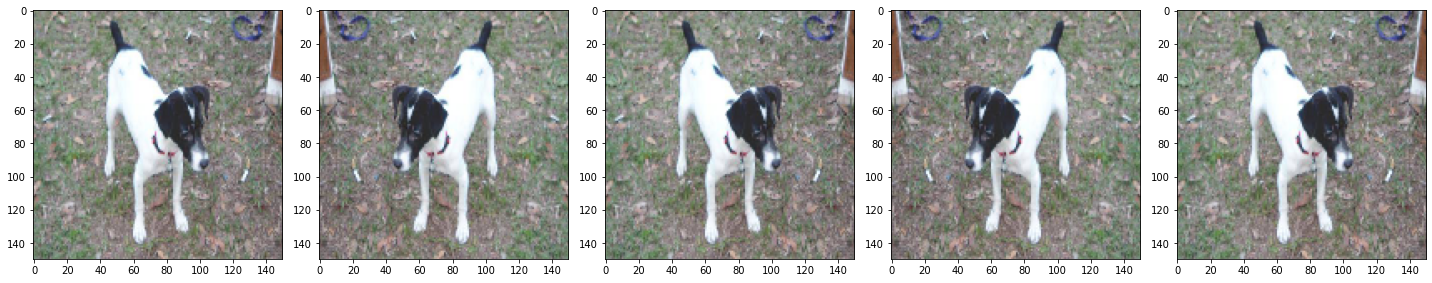

In [15]:
augmented_images=[train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Rotating the image

In [16]:
image_gen=ImageDataGenerator(rescale=1./255,rotation_range=45)
train_data_gen=image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                             directory=train_dir,
                                             shuffle=True,
                                             target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


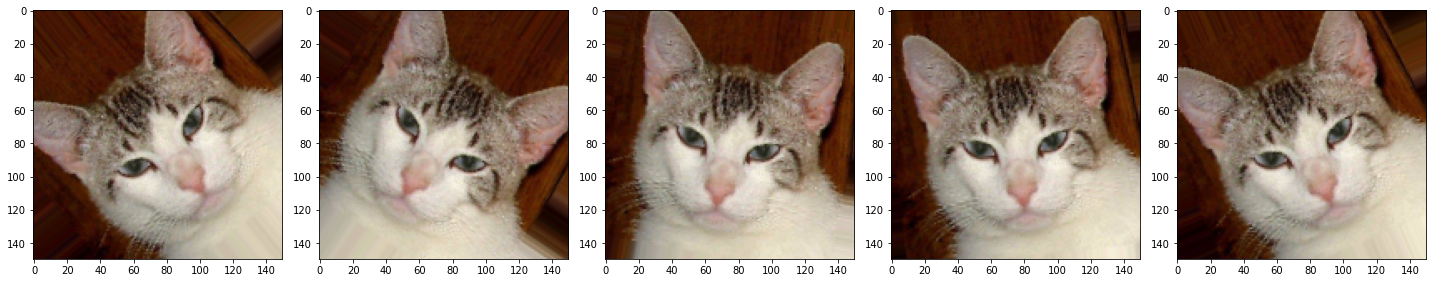

In [17]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Applying Zoom

In [18]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


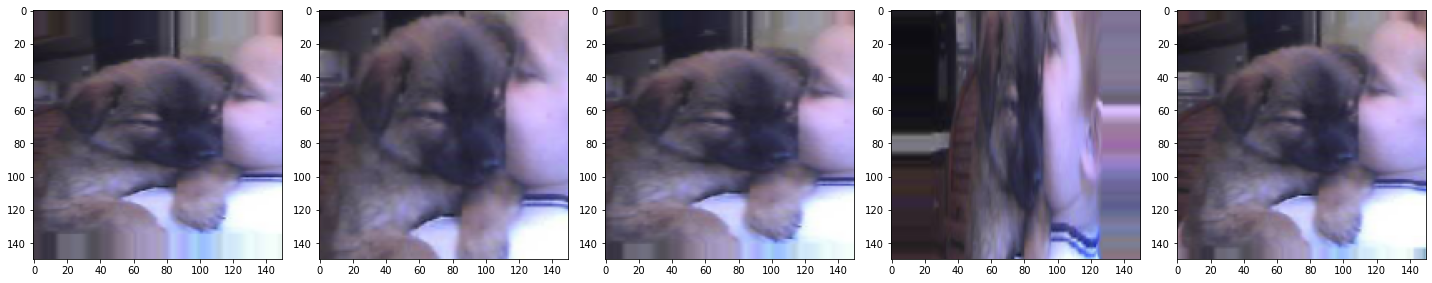

In [19]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Putting it all together

In [23]:
image_gen_train=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


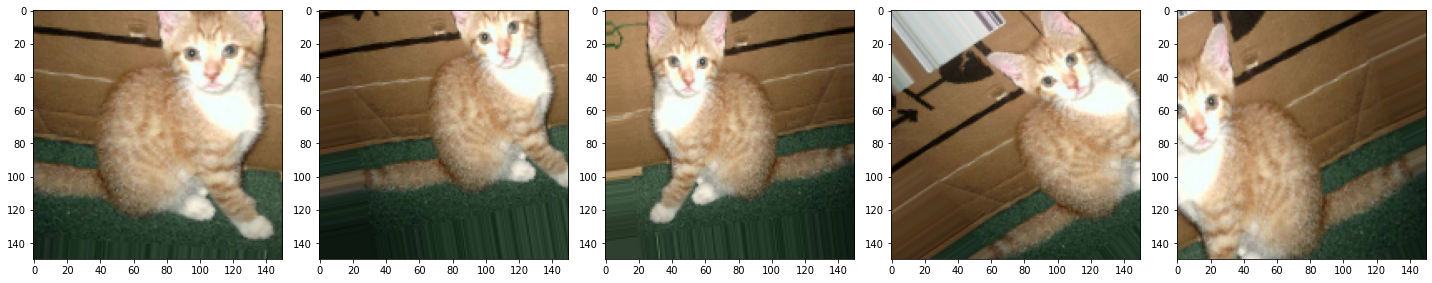

In [24]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Creating Validation Data generator

In [25]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


Model Creation

In [0]:
model=tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512,activation='relu'),
      tf.keras.layers.Dense(2)
])

Compiling the model

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model Summary

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)       1

Train the model

In [31]:
epochs=10
history=model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train/float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val/float(BATCH_SIZE)))

)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
20/20 [==============================] - 103s 5s/step - loss: 0.7141 - accuracy: 0.5210 - val_loss: 0.6856 - val_accuracy: 0.5000
Epoch 2/10
20/20 [==============================] - 102s 5s/step - loss: 0.6858 - accuracy: 0.5350 - val_loss: 0.6791 - val_accuracy: 0.5670
Epoch 3/10
20/20 [==============================] - 102s 5s/step - loss: 0.6782 - accuracy: 0.5470 - val_loss: 0.6564 - val_accuracy: 0.5840
Epoch 4/10
20/20 [==============================] - 102s 5s/step - loss: 0.6662 - accuracy: 0.5750 - val_loss: 0.6478 - val_accuracy: 0.6080
Epoch 5/10
20/20 [==============================] - 102s 5s/step - loss: 0.6619 - accuracy: 0.5720 - val_loss: 0.6656 - val_accuracy: 0.5370
Epoch 6/10
20/20 [==============================] - 105s 5s/step - loss: 0.6562 - accuracy: 0.5785 - val_loss: 0.6460 - val_accuracy: 0.6550
Epoch 7/10
20/20 [==============================] - 101s 5s/step - loss: 0.656

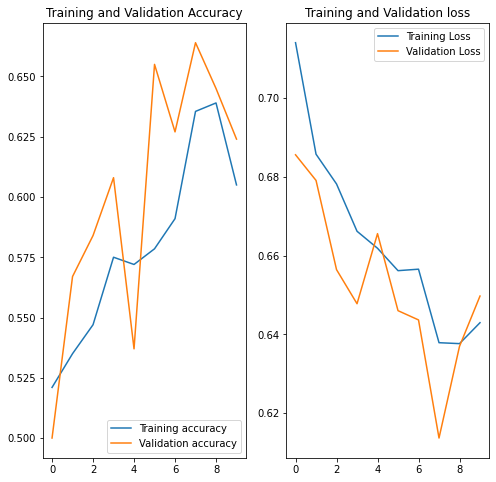

In [34]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epoch_range=range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epoch_range,acc,label='Training accuracy')
plt.plot(epoch_range,val_acc,label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epoch_range,loss,label='Training Loss')
plt.plot(epoch_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')
plt.show()